<Body>   
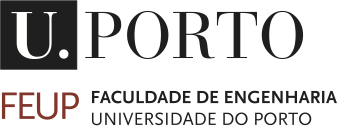   
<h1> <b>Machine Learning 2022/2023 (2<sup>nd</sup> semester) </b> </h1>
<p>Master in Electrical and Computer Engineering </p>
<p>Department of Electrical and Computer Engineering</p>
</Body>  

**A. Pedro Aguiar** (pedro.aguiar@fe.up.pt),
**Aníbal Matos** (anibal@fe.up.pt),
**Daniel Costa** (danielgcosta@fe.up.pt),
**Rui Gonçalves** (rjpg@fe.up.pt)

FEUP, Feb. 2023

---


# **Project #01**

**Note:** This is to be done in group of **2** elements. Use this notebook to answer all the questions. At the end of the work, you should **upload** the **notebook** and a **pdf file** with a printout of the notebook with all the results in the **moodle** platform. 

**Deadlines:** Present the state of your work (and answer questions) on the week of **March 27** in your corresponding practical class. Upload the files until 23:59 of **April 7, 2023**.


---



In [ ]:
# To make a nice pdf file of this file, you have to do the following:
# - upload this file into the running folder (click on the corresponding left icon)
# Then run this (which will make a html file into the current folder):
!jupyter nbconvert --to html "ML_project1.ipynb"
# Then just download the html file and print it to pdf!

# **Identification**

* **Group:** xx
* **Name:** xxx
* **Student Number:**

* **Name:**
* **Student Number:**


---




**Initial setup:** To download the file **data-set.cvs**, run the next cell.

In [ ]:
!wget -O dataset.csv.zip https://www.dropbox.com/s/9y0s2ogjovkwrbm/data-set.csv.zip?dl=0 --quiet
!unzip dataset.csv.zip -d. 


Archive:  dataset.csv.zip
  inflating: ./data-set.csv          
  inflating: ./__MACOSX/._data-set.csv  


In [ ]:
# Then, run this code to get the data-set

import pandas as pd
df = pd.read_csv('data-set.csv', index_col=0)
df
#df

# By convention, values that are zero signify no measurements.
# The units are:
# [m] for x and y
# [m/s] for the velocities vx and vy
# [m] for the LIDAR ranges

,time,x,y,vx,vy,angle -179,angle -178,angle -177,angle -176,angle -175,...,angle 171,angle 172,angle 173,angle 174,angle 175,angle 176,angle 177,angle 178,angle 179,angle 180
0,0.0,-3.946339,-2.912177,0.711051,-0.307325,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.1,0.000000,0.000000,0.678366,-0.308563,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.2,0.000000,0.000000,0.677682,-0.285029,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.3,0.000000,0.000000,0.648523,-0.293170,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.4,0.000000,0.000000,0.644965,-0.277222,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,49.5,3.855108,-3.928327,-0.078142,-0.093745,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
496,49.6,0.000000,0.000000,-0.088140,-0.103430,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
497,49.7,0.000000,0.000000,-0.078002,-0.092986,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
498,49.8,0.000000,0.000000,-0.076514,-0.091199,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# **Part 1: Kalman filter design**



Consider a holonomic mobile robot in the 2D plan and suppose that one can get measurements from its linear velocity every time step $t=0, 0.1, 0.2, \ldots$ (in seconds) and its position every time step $t=0, 0.5, 1.0, 1.5 \ldots$ (in seconds). Suppose also that the measurements are corrupted by additive Gaussian noise and furthermore, the linear velocity measurements may also include a unknown but constant bias term. The goal is to obtain an estimate of the position of the robot together with a measure of its uncertainty. To this end, we will implement a Kalman filter (KF)!
 
### **Model:**
Let $(x_t, y_t)$ be the position of the robot at time step $t$, and $(v_{x,t}, v_{y,t})$ its linear velocity. Let $(b_{x,t}, b_{y,t})$ be the bias term and $w_t$ and $\eta_t$ Gaussian noises. Then, a state-space model to design the KF can be written as


*x-direction*
\begin{align*}
\begin{bmatrix}
x_{t+1} \\
b_{x,t+1}
\end{bmatrix}
&= \begin{bmatrix}
1 &h \\
0 &1
\end{bmatrix}
\begin{bmatrix}
x_{t} \\
b_{x,t}
\end{bmatrix}
+\begin{bmatrix}
h \\
0
\end{bmatrix}
v_{x,t}
+ w_{x,t} \quad t=0, 0.1, 0.2, \ldots \\
z_{x,t} &= 
\begin{bmatrix}
1 & 0
\end{bmatrix}
\begin{bmatrix}
x_{t} \\
b_{x,t}
\end{bmatrix} +  \eta_{x,t}, \quad t=0, 0.5, 1.0, 1.5 \ldots
\end{align*}

*y-direction*
\begin{align*}
\begin{bmatrix}
y_{t+1} \\
b_{y,t+1}
\end{bmatrix}
&= \begin{bmatrix}
1 &h \\
0 &1
\end{bmatrix}
\begin{bmatrix}
y_{t} \\
b_{y,t}
\end{bmatrix}
+\begin{bmatrix}
h \\
0
\end{bmatrix}
v_{y,t}
+ w_{y,t} \quad t=0, 0.1, 0.2, \ldots \\
z_{y,t} &= 
\begin{bmatrix}
1 & 0
\end{bmatrix}
\begin{bmatrix}
y_{t} \\
b_{y,t}
\end{bmatrix} +  \eta_{y,t}, \quad t=0, 0.5, 1.0, 1.5 \ldots
\end{align*}
where $(z_{x,t}, z_{y,t})$ is the output vector and $h=0.1\,s$ is the sample time.

**Note:** We have decomposed the model in two decoupled parts (x and y directions). Thus, it is possible to design a KF for each direction.

**1.1** 
Implement 2 KFs (one for each direction) and display the evolution along time of the estimated position of the robot and the estimated bias term. Display also the estimated trajectory 2D.

In [ ]:
import numpy as np
from numpy import * 
import matplotlib.pyplot as plt

time = df["time"].values
x = df["x"].values
y = df["y"].values
vx = df["vx"].values
vy = df["vy"].values


'# v\nchart2 = fig.add_subplot(212)\nchart2.plot(t_time, train_v_time, label=\'train_v\', c="g", linewidth=3, alpha=0.2)\nchart2.plot(t_time,v_time, label=\'v\', c="g")\nchart2.fill_between(t_time,v_dn_time,v_up_time, alpha=0.2, label=\'$v\\pm\\sigma$\')\nchart2.set_ylabel(\'v [m/s]\')\nchart2.set_xlabel(\'t [s]\')\nplt.legend(loc=\'upper left\')\nplt.grid()\nplt.show()\n'

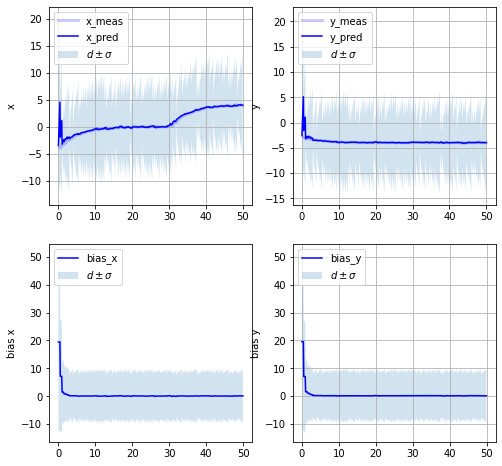

In [ ]:

import matplotlib.pyplot as plt
import numpy as np
from numpy import dot 
from numpy import * 
from numpy.linalg import inv 
from numpy.linalg import det
import random
random.seed(3)


def kf_predict(X, P, A, Q, B, U): 
    """      
      X : The mean state estimate of the previous step (k−1) - shape(m,1) 
      P : The state covariance of previous step (k−1) - shape(m,m) 
      A : The transition  matrix - shape(m,m) 
      Q : The process noise covariance matrix - shape(m,m) 
      B : The input effect matrix - shape(p, m) 
      U : The control input - shape(q,1)
    """ 
    X = A @ X + B @ U 
    P = A @ P @ A.T + Q 
    return(X,P) 

def kf_update(X, P, Y, H, R): 
    """      
      K  : the Kalman Gain matrix 
      IS : the Covariance or predictive mean of Y  
    """
    IS = H @ P @ H.T + R  
    K = P @ H.T @ inv(IS) 
    X = X + K @ (Y- H @ X) 
    P = P - K @ IS @ K.T 
#    P = P - K @ H @ P 
    return (X,P) 

# time step
h = 0.1

# ini state (Position, Bias) = (0,0)
## Initial bias = 0 ???
X_x = np.array( [ [0.0] , [20.0]]  ) 
X_y = np.array( [ [0.0] , [20.0]]  ) 

# ini Covar : we start with a very high variance and during it the variance will converge to a lower value
P_x = np.array( [ [ 999.0, 0.0 ] ,
                [ 0.0, 999.0 ] ]  ) 
P_y = np.array( [ [ 999.0, 0.0 ] ,
                [ 0.0, 999.0 ] ]  ) 


# state matrix 
A = np.array( [ [ 1.0, h ] ,
                [ 0.0, 1.0  ] ] )         

# input effect matrix
B = np.array( [ [h], [0] ] )     

# meas matrix
H = np.array( [ [ 1.0, 0.0 ] ] )          

## Ask for the noise

# meas noise
R = np.array([ [random.randint(0,100)] ] ) 

# process noise
Q = np.array(np.eye(2) * 5 ) 

# every 5 iteration
t_time = []

# means    
x_time = []      # x position of robot over time (mean)
y_time = []
bias_x_time = []      # x bias over time (mean)
bias_y_time = []

# std devs     
x_sd_time = []      # x position of robot over time (std)
y_sd_time = []
bias_sd_x_time = []      # x bias over time (std)
bias_sd_y_time = []

# up and down
x_up_time = []   # d mean + one std_dev
y_up_time = []
x_dn_time = []   # d mean - one std_dev
y_dn_time = []  
b_x_up_time = []  
b_y_up_time = []
b_x_dn_time  = []
b_y_dn_time = []



#
# Kalman Filter loop
#

N_iter = len(time)    # implies dt*N_iter seconds
tt = 0
for t in arange(0, N_iter):

  U_x = np.array([ [vx[t]] ]) # put the input in the right variable
  U_y = np.array([ [vy[t]] ])

  R = np.array([ [random.randint(0,100)] ] ) 
  
  (X_x, P_x) =  kf_predict(X_x, P_x, A, Q, B, U_x)
  (X_y, P_y) =  kf_predict(X_y, P_y, A, Q, B, U_y)

  if t%5 == 0:
    tt += 0.5
    t_time.append(tt)
    Y_x = np.array([ [x[t]] ])
    Y_y = np.array([ [y[t]] ])
    
    (X_x, P_x) = kf_update(X_x, P_x, Y_x, H, R)
    (X_y,P_y) =  kf_update(X_y, P_y, Y_y, H, R) 

  # mean
  x_time.append( X_x[0].item() )
  bias_x_time.append( X_x[1].item() )
  y_time.append( X_y[0].item() )
  bias_y_time.append( X_y[1].item() )

  # std devs
  x_sd_time.append( P_x[0][0].item() )
  bias_sd_x_time.append( P_x[1][1].item() )
  y_sd_time.append( P_y[0][0].item() )
  bias_sd_y_time.append( P_y[1][1].item() )

  # up and down
  x_up_time.append( X_x[0].item() + sqrt( P_x[0][0]).item() )
  y_up_time.append( X_y[0].item() + sqrt( P_y[0][0]).item() )
  x_dn_time.append( X_x[0].item() - sqrt( P_x[0][0]).item() )
  y_dn_time.append( X_y[0].item() - sqrt( P_y[0][0]).item() )
    
  b_x_up_time.append( X_x[1].item() + sqrt( P_x[1][1]).item() )
  b_y_up_time.append( X_y[1].item() + sqrt( P_y[1][1]).item() )
  b_x_dn_time.append( X_x[1].item() - sqrt( P_x[1][1]).item() )
  b_y_dn_time.append( X_y[1].item() - sqrt( P_y[1][1]).item() )

x_no_zero = [el for el in x if el !=0]
y_no_zero = [el for el in y if el !=0]
fig = plt.figure(figsize=(8,8))
# x
chart1 = fig.add_subplot(221)
chart1.plot(t_time, x_no_zero, label='x_meas', c="b", linewidth=3, alpha=0.2)
chart1.plot(time,x_time, label='x_pred', c="b")
chart1.fill_between(time, x_dn_time, x_up_time, alpha=0.2, linewidth=0, label='$d\pm\sigma$')
plt.legend(loc='upper left')
chart1.set_ylabel('x')
plt.grid()

# y
chart2 = fig.add_subplot(222)
chart2.plot(t_time, y_no_zero, label='y_meas', c="b", linewidth=3, alpha=0.2)
chart2.plot(time,y_time, label='y_pred', c="b")
chart2.fill_between(time, y_dn_time, y_up_time, alpha=0.2, linewidth=0, label='$d\pm\sigma$')
plt.legend(loc='upper left')
chart2.set_ylabel('y')
plt.grid()

# bias x
chart3 = fig.add_subplot(223)
chart3.plot(time,bias_x_time, label='bias_x', c="b")
chart3.fill_between(time, b_x_dn_time, b_x_up_time, alpha=0.2, linewidth=0, label='$d\pm\sigma$')
plt.legend(loc='upper left')
chart3.set_ylabel('bias x')

# bias y 
chart4 = fig.add_subplot(224)
chart4.plot(time,bias_y_time, label='bias_y', c="b")
chart4.fill_between(time, b_y_dn_time, b_y_up_time, alpha=0.2, linewidth=0, label='$d\pm\sigma$')
plt.legend(loc='upper left')
chart4.set_ylabel('bias y')

plt.grid()

'''# v
chart2 = fig.add_subplot(212)
chart2.plot(t_time, train_v_time, label='train_v', c="g", linewidth=3, alpha=0.2)
chart2.plot(t_time,v_time, label='v', c="g")
chart2.fill_between(t_time,v_dn_time,v_up_time, alpha=0.2, label='$v\pm\sigma$')
chart2.set_ylabel('v [m/s]')
chart2.set_xlabel('t [s]')
plt.legend(loc='upper left')
plt.grid()
plt.show()
'''
 
# End For Loop



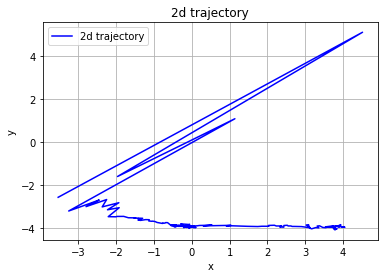

In [ ]:

# x
plt.figure()
plt.plot(x_time, y_time, label='2d trajectory', c="b")
plt.title('2d trajectory')
plt.ylabel('y')
plt.xlabel('x')
plt.legend(loc='upper left')
plt.grid()

# **Part 2: Linear Regression**



In this part, the aim is to build a map of the environment by combining the position of the robot with the measurements of the 2D **LIDAR** that is on-board of the robot. The LIDAR measurements consist of range (distance) from the robot to a possible obstacle for each degree of direction, that is, 
$$
r_t = \{r_\beta + \eta_r : \beta=-179^o, -178^o, \ldots, 0^o, \ldots, 180^o\}
$$
where $\eta_r$ is assumed to be Gaussian noise. The sample time is the same, that is, $h=0.1\,s$, but the LIDAR measurements are outputted every time step $t=0,0.5,1.0, 1.5, \ldots$ (in seconds) like the robot position in the previous exercise. Moreover, if there is no obstacle within the direction of the laser range or if it is far away, that is, if the distance is greater than $5\,m$, by convention the range measurement is set to zero. It may also happen that the LIDAR in some cases may output an *outlier*.

The next figure shows $r_t$ as a function of the angle $\beta$ for $t=5.0\,s$.

(500, 360)


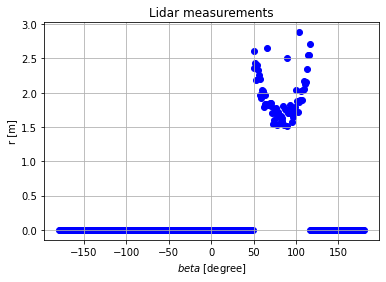

In [ ]:

time = df["time"].values
Lidar_range = df.iloc[:, np.arange(5,365,1)].values

t=5*10 # t = 5 sec * 1/sample_time
angle = np.linspace(-179, 180, num=360)

plt.figure()
plt.scatter(angle, Lidar_range[t], color='b')
plt.title('Lidar measurements')
plt.ylabel('r [m]')
plt.xlabel('$beta$ [degree]')
plt.grid();



**2.1**
Using the estimated position of the robot (computed in the previous exercise) and the LIDAR data, 
1. Obtain the cloud points in the 2D plan that the robot sense at **$t=5\,s$** and plot them. Do not forget to remove the zero ranges and note that  

$$
\begin{align*}
\hat x_{o,t} = \hat x_t + r_t \cos\beta \\
\hat y_{o,t} = \hat y_t + r_t \sin\beta
\end{align*}
$$

2. Perform a linear regression for the previous data using a model of the type
\begin{equation} \color{green} { y = \theta_0 + \theta_1 x } 
 \end{equation}
and display the results, that is, display the resulting 2d map, the mean square error, and the optimal parameters for $\color{green} \theta$. To this end, apply the related Least Square (LS) normal equations and **only use** the sklearn to confirm the obtained values.



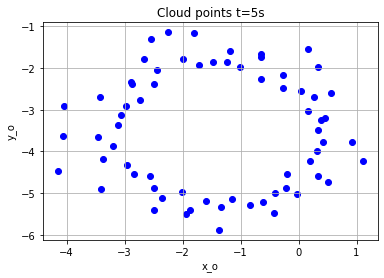

In [ ]:
# Part 2.1.1

Lidar_range = df.iloc[:, np.arange(5,365,1)].values



#Build the cloud points in 2D plan
x_o, y_o = [], []
angle = np.linspace(-179, 180, num=360)

t=5*10   # t = 5 sec * 1/sample_time

for i in range(len(Lidar_range[t])):
  if Lidar_range[t][i] > 0:
    x_o.append(x_time[t]+Lidar_range[t][i]*np.cos(angle[i]))
    y_o.append(y_time[t]+Lidar_range[t][i]*np.sin(angle[i]))


plt.figure()
plt.scatter(x_o, y_o, color='b')
plt.title('Cloud points t=5s')
plt.ylabel('y_o')
plt.xlabel('x_o')
plt.grid();


Training:
 (67, 2)
Label:
 (67, 1)
 Linear Regression 
Parameters theta =
 [[-0.08051283]
 [ 1.        ]]


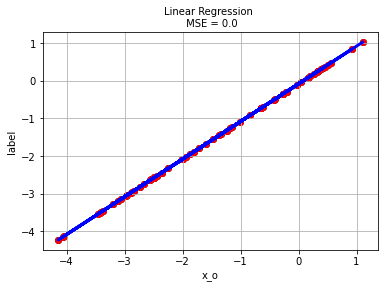

Coef =  [[0. 1.]]
Intercept =  [-0.08051283]


In [ ]:
# Linear regression for x_o

import numpy as np
from scipy import linalg
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

x = df["x"].values

#Create X matrix with ones
X = np.ones((len(x_o), 1), dtype=float)
X = np.concatenate((X, np.array(x_o).reshape(len(x_o),1)), axis = 1)
#Create Y matrix
Y=[]
for i in range(len(Lidar_range[t])):
  if Lidar_range[t][i] > 0:
    Y.append(x[t]+Lidar_range[t][i]*np.cos(angle[i]))
Y = np.array(Y).reshape(len(Y),1)

print("Training:\n", X.shape)
print("Label:\n", Y.shape)

print(" Linear Regression ")

# Normal Equation: (X.t X)^-1 X.t Y
theta = np.linalg.inv(np.transpose(X) @ X) @ np.transpose(X) @ Y

print("Parameters theta =\n", theta)


# Singular Value Decomposition (SVD) of the matrix (X.t X)
M = np.transpose(X) @ X 
u, s, vh = np.linalg.svd(M, full_matrices=True)
 
# Precticted values
Y_predict = X @ theta

#Model's error
MSE = mean_squared_error(Y, Y_predict)

### Plot
plt.scatter(x_o, Y, color="black")
plt.scatter(x_o,Y_predict,color="red")
plt.plot(x_o, Y_predict,  color="blue", linewidth=3)
plt.grid()

title = 'MSE = {}'.format(round(MSE,2))
plt.title("Linear Regression \n " + title, fontsize=10)
plt.xlabel('x_o')
plt.ylabel('label')
plt.show()


# Using sklearn 
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
model = linear_model.LinearRegression()
model.fit(X, Y)
print("Coef = ", model.coef_)
print("Intercept = ", model.intercept_)

Training:
 (67, 2)
Label:
 (67, 1)
 Linear Regression 
Parameters theta =
 [[2.52492248e-04]
 [1.00000000e+00]]


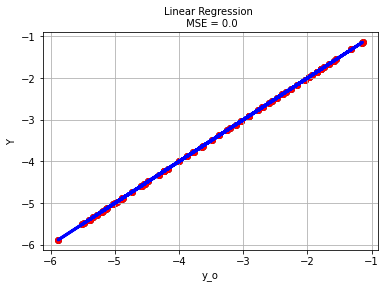

Coef =  [[0. 1.]]
Intercept =  [0.00025249]


In [60]:
# Linear regression for y_o

import numpy as np
from scipy import linalg
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

y = df["y"].values

#Create X matrix with ones
X = np.ones((len(y_o), 1), dtype=float)
X = np.concatenate((X, np.array(y_o).reshape(len(y_o),1)), axis = 1)
#Create Y matrix
Y=[]
for i in range(len(Lidar_range[t])):
  if Lidar_range[t][i] > 0:
    Y.append(y[t]+Lidar_range[t][i]*np.sin(angle[i]))
Y = np.array(Y).reshape(len(Y),1)

print("Training:\n", X.shape)
print("Label:\n", Y.shape)

print(" Linear Regression ")

# Normal Equation: (X.t X)^-1 X.t Y
theta = np.linalg.inv(np.transpose(X) @ X) @ np.transpose(X) @ Y

print("Parameters theta =\n", theta)


# Singular Value Decomposition (SVD) of the matrix (X.t X)
M = np.transpose(X) @ X 
u, s, vh = np.linalg.svd(M, full_matrices=True)
 
# Precticted values
Y_predict = X @ theta

#Model's error
MSE = mean_squared_error(Y, Y_predict)

### Plot
plt.scatter(y_o, Y, color="black")
plt.scatter(y_o,Y_predict,color="red")
plt.plot(y_o, Y_predict,  color="blue", linewidth=3)
plt.grid()

title = 'MSE = {}'.format(round(MSE,2))
plt.title("Linear Regression \n " + title, fontsize=10)
plt.xlabel('y_o')
plt.ylabel('Y')
plt.show()


# Using sklearn 
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
model = linear_model.LinearRegression()
model.fit(X, Y)
print("Coef = ", model.coef_)
print("Intercept = ", model.intercept_)

In [ ]:
# Part 2.1.2

#To complete


**2.2**
Repeat the previous exercise but now with a polynomial model of the type
\begin{equation} \color{green} { y = \theta_0 + \theta_1 x + \theta_2 x^2 } 
 \end{equation}



In [ ]:
# To complete


**2.3**
At this point you can use sklearn! 
Do the same as the previous exercise (polynomial model) but now with **degree 10**. Moreover, implement also a regression with **Ridge** regularization and a regression with **LASSO** regularization. Do not forget to display the obtained results. What can you conclude?




In [ ]:
# To complete


**2.4**
We now would like to use all the LIDAR data. One simple option (off-line) is to make a data set with all the cloud point positions in 2D and apply the linear regression techniques.

Using sklearn, do this for LS, LS+Ridge, LS+LASSO using the polynomial model of degree 10. Display the results (map 2D) and the optimal values for 
$\color{green} \theta$.


In [ ]:
# To complete


**2.5 (Extra)** 
Another option (on-line) is to make a linear regression with only the LIDAR data that is being acquired at each snapshot of time $t=0, 0.5, 1.0, \ldots$ and update the optimal value $\color{green} \theta$ using a gradient descent rule
$$
\color{green}
{\theta_{t+1}=\theta_t - \gamma \nabla J(\theta_t),}
$$
where $\color{green} \gamma>0$ is the learning rate, and $\color{green}
 {\nabla J(\theta_{t})}$ is the gradient at each snapshot of the cost
$$
\color{green}
{J(\theta) = \sum_{n=1}^N \big(y_n-\theta^{T} \phi(x_n)\big)^2 }
$$
where $N$ is the number of valid (that is non zero) range measurements at instant $t$.

Implement this strategy and plot the results.

**Note:** This question is optional. If you solve it, you get extra 15 points (in 100).

In [ ]:
# To complete
